In [73]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

import sys
import os
sys.path.append(os.path.abspath("./"))
import importlib
importlib.reload(cleaning)  # Force reload the module
import cleaning

import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.model_selection import train_test_split
from sklearn import metrics


# Data Cleaning and EDA

## Clean the data
### Process of cleaning 

*Code written for cleaning in [cleaning.py](./cleaning.py).*

* We'll pass a list of the csv files from reddit into a function that cleans and concatenates the csvs into one dataframe.
    * It doesn't make much sense to keep posts that are null in the "selftext" column, so those will be removed.
    * Next, I will remove any rows where this is the case. We'll also rename the "Unnamed: 0" column to "post_id".
    * Also, we'll remove the "comments" columns. These were pulled in just in case they gave any additional information, but for now, they will be removed. They can be accessed at another time if needed. 
    * A column that assigns 0/1 values for the subreddit: 0 for the rpg subreddit, 1 for the osr subreddit will be added
    * Return the concatenated dataframe
* Once the completed dataframe is created, use "post_id" to deduplicate the data. We'll get a final count of the subreddit post totals to see if we need to pull in more data. 


In [37]:
files = [f"../data/{file}" for file in os.listdir("../data") if file.endswith(".csv")]
files.remove('../data/cleaned_df.csv')
files.remove('../data/cleaned_with_sentiment_df.csv')

files

['../data/osr_244-489.csv',
 '../data/nsr_1000-1150.csv',
 '../data/osr_1931-2163.csv',
 '../data/osr_1683-1931.csv',
 '../data/nsr_1150-1394.csv',
 '../data/osr_0-243.csv',
 '../data/osr_490-1190.csv',
 '../data/osr_1190-1433.csv',
 '../data/nsr_1394-1628.csv',
 '../data/nsr_0-999.csv',
 '../data/nsr_1628-1862.csv',
 '../data/osr_1433-1683.csv']

In [38]:
cleaned = cleaning.clean_data(files)

/Users/bolanle/Desktop/dsb-210/projects/project-3/code/cleaning.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_df = pd.concat([concat_df, df])


In [144]:
cleaned.head()

,post_id,title,selftext,subreddit,created_utc,is_osr
1,1irnln3,HeroQuest is the perfect intro to OSR.,HeroQuest is the perfect entry into OSR DND. ...,osr,1.739809e+09,1
2,1f3scds,"B/X is so intuitive, I don't have to really ""p...","To be clear, it was a lot of work before the g...",osr,1.724901e+09,1
3,1di0qn6,My most disappointing Kickstarter that filfilled,"So, I know there was a thread discussing peopl...",osr,1.718638e+09,1
4,1g5ga0h,Got the complete set off ebay for 80 bucks!,Really loving the booklet layout. Open up char...,osr,1.729131e+09,1
5,1grfhij,Castles & Crusades: Best Modern Edition of D&D...,In this video I discuss why I consider Castles...,osr,1.731619e+09,1


In [145]:
cleaned = cleaned.drop_duplicates(subset="post_id")

In [146]:
cleaned["is_osr"].value_counts()


is_osr
1    1145
0    1102
Name: count, dtype: int64

In [42]:
cleaned.shape
cleaned.head()
cleaned.tail()


,post_id,title,selftext,subreddit,created_utc,is_osr
1,1irnln3,HeroQuest is the perfect intro to OSR.,HeroQuest is the perfect entry into OSR DND. ...,osr,1.739809e+09,1
2,1f3scds,"B/X is so intuitive, I don't have to really ""p...","To be clear, it was a lot of work before the g...",osr,1.724901e+09,1
3,1di0qn6,My most disappointing Kickstarter that filfilled,"So, I know there was a thread discussing peopl...",osr,1.718638e+09,1
4,1g5ga0h,Got the complete set off ebay for 80 bucks!,Really loving the booklet layout. Open up char...,osr,1.729131e+09,1
5,1grfhij,Castles & Crusades: Best Modern Edition of D&D...,In this video I discuss why I consider Castles...,osr,1.731619e+09,1


### There are at least 1000 posts from each subreddit, so the dataframe can saved.

In [147]:
#cleaned.to_csv("../data/reddit_cleaned_df.csv")

## EDA
### Now that there is a dataframe with our reddit data, let's explore it a bit.

In [44]:
cleaned["is_osr"].value_counts(normalize=True) 

is_osr
1    0.509568
0    0.490432
Name: proportion, dtype: float64

### Baseline Accuracy
Our baseline accuracy is 50.9% that subreddit will be from the osr subreddit. First, let's normalize our text by our tokenizing, lemmatizing, stemming, and  removing special characters and stop words.


### We'll use TF-IDF Vectorizer
This is going to vectorize our data and weigh the importance of the words in our documents. TF-IDF Vectorizer does not assume that words with more frequency simply have greater importance. It wiil measure the term frequency and the inverse document frequency.

Let's make a function to vectorize selftext and check out unigrams and bigrams for our subreddits, together and separately.

***Code can be found here: [cleaning.py](./cleaning.py).***

In [ ]:
# REMOVE THE DF READ BELOW

In [38]:
X = cleaned["selftext"]
y = cleaned["is_osr"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

game         169.184644
like         157.995326
one          127.208128
players      105.905154
rpg          103.498871
would        103.248386
games         98.840931
osr           97.566330
new           93.853259
know          91.284585
play          91.254825
people        88.113890
time          87.292655
want          87.074398
system        86.998865
rules         85.866986
really        85.045014
think         84.722474
get           82.598887
also          75.006879
campaign      73.472071
good          70.416999
make          69.560812
character     69.441850
even          68.182852
dtype: float64


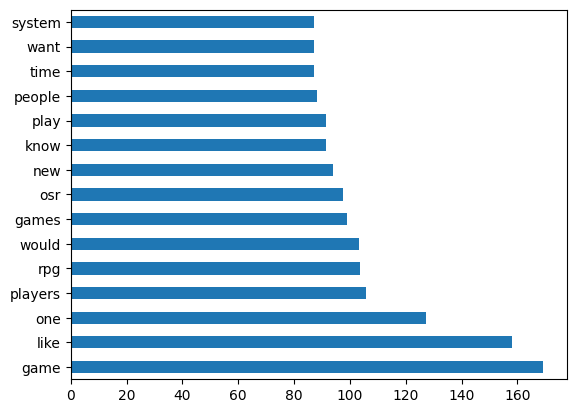

In [39]:
#clean df unigram
cleaning.tfidf_list_and_barplot(1, 1, X_train, X_test, y_train, y_test)

### Common unigrams in combined data: 
In the combined data we see common unigrams such as game, like, rpg, one, players. At least a few of these are a specifically meaningful like players, rpg, and game as they relate to role-playing games in an obvious way. The word one being so high is likely due to the recent release of D&D One in late 2024. 

old school            61.743930
feel like             57.139805
years ago             38.343550
b x                   38.117507
would like            28.000502
first time            27.964197
feels like            27.328299
seems like            26.992972
role playing          26.245165
osr games             25.978701
dungeons dragons      25.402674
let know              24.527793
one shot              24.217952
feel free             24.144257
character creation    23.968866
would love            23.469444
things like           23.407876
sci fi                22.887604
one players           22.564192
3 5                   20.936988
something like        20.650552
games like            20.384116
e g                   20.237612
running game          19.849407
really like           19.802094
dtype: float64


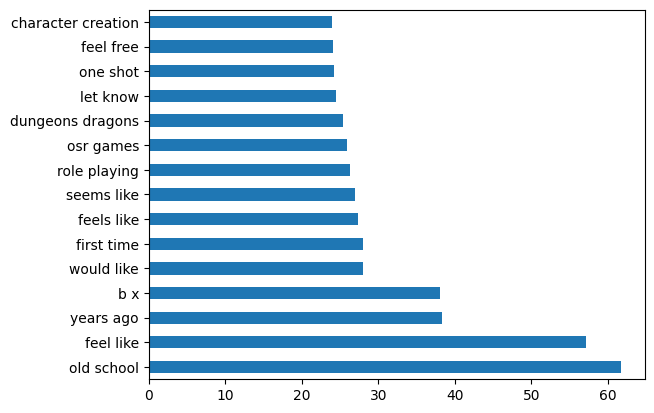

In [40]:
#cleaned df bigrams
cleaning.tfidf_list_and_barplot(2, 2, X_train, X_test, y_train, y_test)

### Common bigrams in combined data: 
In the combined data we see common bigrams such as old school, feel like, and years ago. This might mean that one subreddit is talking a lot about any of these bigrams. Since TF-IDF Vectorization weigh text, these words might show up in documents from one subreddit a lot. It's not unlikely that both subreddits are talking about old school games or using the phrase, "feel like". Both the rpg and osr subreddits are commonly used to request help in finding games and oftentimes role-players will seek out games that have a certain "feel" or "vibe." 

Next, we'll separate the osr and rpg data into their own dataframes so we can look at the unigrams and bigrams for each. 

In [33]:
#separate osr and rpg into their own dfs
osr_df = cleaned.loc[cleaned['is_osr'] == 1]
rpg_df = cleaned.loc[cleaned['is_osr'] == 0]


In [47]:
#osr, test train split

X1 = osr_df["selftext"]
y1 = osr_df["is_osr"]

# Train/test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, 
                                                    y1, 
                                                    random_state=123)



like         79.800380
osr          75.228065
game         70.447708
one          58.585866
new          55.944817
would        52.081456
players      49.397024
rules        46.083283
know         45.856860
really       41.466249
system       41.289459
campaign     41.197324
rpg          41.059356
play         40.449382
also         39.889638
games        39.655862
dungeon      38.802425
want         38.658554
get          37.443029
think        37.212289
good         35.671005
time         35.655229
adventure    35.610054
run          34.208159
5e           34.194775
dtype: float64


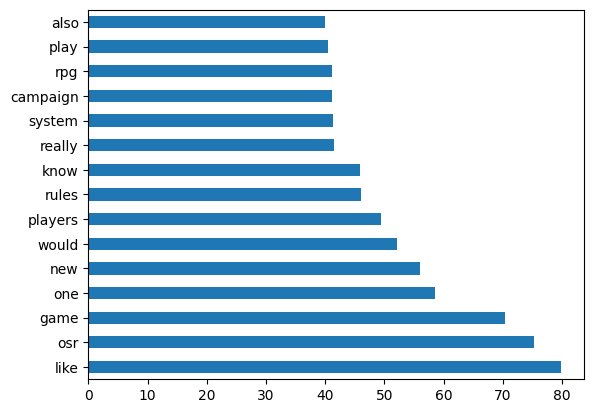

In [48]:
# osr dataframe unigrams
cleaning.tfidf_list_and_barplot(1, 1, X_train_1, X_test_1, y_train_1, y_test_1)

### Common unigrams in osr data: 
We see that the words like, osr, game, one, and new show up in the osr group in heavier weight. As expected, osr it high on the list and as stated above, "like" indicates that people come to this subreddit looking for game reccomendations. It also appears that people in this subreddit are talking about the new D&D One release from late last year ("one"). They are interested in "system" and "rules" which tracks as players who like osr games typically are looking for specific game mechanics. 

old school            49.237773
b x                   34.057278
osr games             19.859519
feel like             18.395447
osr community         16.746950
years ago             14.873793
seems like            13.986029
character creation    13.346689
really like           13.341345
school essentials     13.249213
would like            13.102879
osr game              12.877339
basic fantasy         12.835250
something like        12.811236
let know              12.406099
would love            11.446000
role playing          11.217531
dungeons dragons      11.133488
one shot              11.012761
feels like            10.189479
magic items           10.005232
osr style              9.943602
random tables          9.855963
thanks advance         9.818373
campaign setting       9.782065
dtype: float64


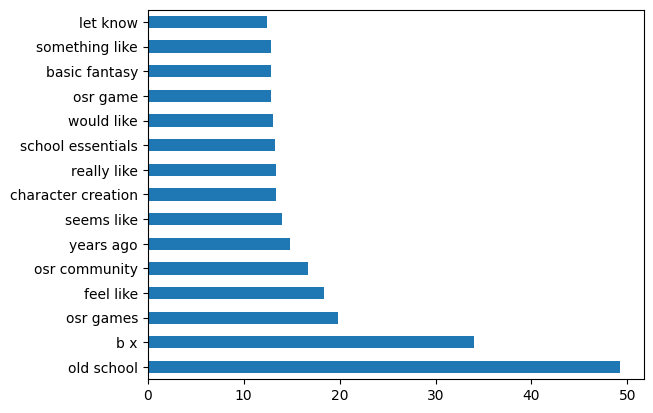

In [52]:
# osr dataframe bigrams
cleaning.tfidf_list_and_barplot(2, 2, X_train_1, X_test_1, y_train_1, y_test_1)

### Common bigrams in osr data: 
The osr group talks about "old school", "b x", and "osr games". The most notable bigrams on the list are specifically "b x" and "school essentials". "B x" is how a version of original D&D gets called by players, as that version never got an official name. "School essentials" refers to "old school essentials" which is a role-playing game system which is a modern adapatation/revision of "b x".


In [44]:
# for rpg, uni- and bigrams

# Suppose `cleaned` is your DataFrame
X2 = rpg_df["selftext"]
y2 = rpg_df["is_osr"]

# Train/test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, random_state=123)


game         96.726852
like         79.349489
one          70.644855
players      64.472233
games        58.476541
rpg          55.605391
people       54.553049
time         53.489034
would        52.694365
play         51.512900
system       47.920969
get          47.586184
want         45.773963
character    45.104610
think        44.145200
know         43.815503
really       43.080596
new          43.004661
even         41.030752
gm           40.017776
make         38.837031
also         37.871574
rules        37.668523
much         37.392348
something    36.991717
dtype: float64


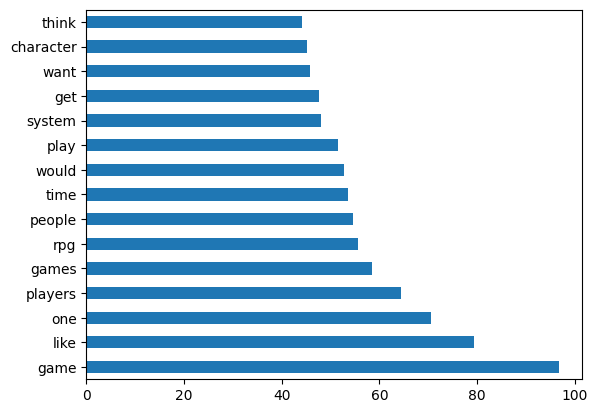

In [53]:
# osr dataframe unigrams
cleaning.tfidf_list_and_barplot(1, 1, X_train_2, X_test_2, y_train_2, y_test_2)

### Common unigrams in rpg data: 
There should be no surprise that "games", "rpg", "players", syste

feel like           29.118647
years ago           19.170378
first time          17.252273
feel free           15.693711
feels like          15.242069
one players         14.558594
star wars           14.362306
looks like          13.619030
sci fi              13.482769
would like          12.640571
role playing        12.084164
running game        12.053144
games like          11.736096
call cthulhu        11.328123
want play           11.231024
play game           11.208080
pretty much         10.851520
dungeons dragons    10.820162
many people         10.582761
tl dr               10.392764
run game            10.320532
one thing           10.295519
even though         10.054336
last year            9.916779
year old             9.889647
dtype: float64


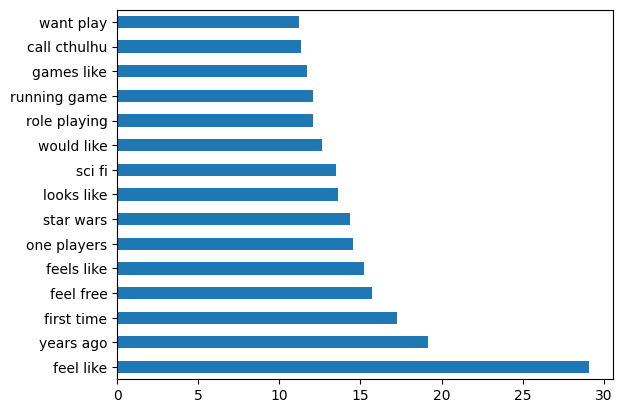

In [54]:
# rpg dataframe bigrams
cleaning.tfidf_list_and_barplot(2, 2, X_train_2, X_test_2, y_train_2, y_test_2)

### Common bigrams in osr data: 


Words show most in osr


**Before we look at any possible correlation between is_osr, let's add a few more numeric columns. We can add a word count, a character text count, and sentiment analysis columns.**

In [90]:
osr_df["text_len"] = osr_df["selftext"].str.len()
osr_df["word_count"] = osr_df["selftext"].str.split().apply(len)
osr_df.head()

rpg_df["text_len"] = rpg_df["selftext"].str.len()
rpg_df["word_count"] = rpg_df["selftext"].str.split().apply(len)
rpg_df.head()

cleaned["text_len"] = cleaned["selftext"].str.len()
cleaned["word_count"] = cleaned["selftext"].str.split().apply(len)
cleaned.head()

,post_id,title,selftext,subreddit,created_utc,is_osr,text_len,word_count
0,1irnln3,HeroQuest is the perfect intro to OSR.,HeroQuest is the perfect entry into OSR DND. ...,osr,1.739809e+09,1,213,36
1,1f3scds,"B/X is so intuitive, I don't have to really ""p...","To be clear, it was a lot of work before the g...",osr,1.724901e+09,1,2434,441
2,1di0qn6,My most disappointing Kickstarter that filfilled,"So, I know there was a thread discussing peopl...",osr,1.718638e+09,1,899,166
3,1g5ga0h,Got the complete set off ebay for 80 bucks!,Really loving the booklet layout. Open up char...,osr,1.729131e+09,1,313,50
4,1grfhij,Castles & Crusades: Best Modern Edition of D&D...,In this video I discuss why I consider Castles...,osr,1.731619e+09,1,85,16


In [74]:
sa = SentimentIntensityAnalyzer()

sentiment_data = [sa.polarity_scores(text) for text in cleaned["selftext"]]
sentiment_df = pd.DataFrame.from_dict(sentiment_data)
cleaned = pd.concat([cleaned, sentiment_df],axis=1)
cleaned.head()

,post_id,title,selftext,subreddit,created_utc,is_osr,text_len,word_count,neg,neu,pos,compound
0,1irnln3,HeroQuest is the perfect intro to OSR.,HeroQuest is the perfect entry into OSR DND. ...,osr,1.739809e+09,1,213,36,0.118,0.708,0.174,0.5313
1,1f3scds,"B/X is so intuitive, I don't have to really ""p...","To be clear, it was a lot of work before the g...",osr,1.724901e+09,1,2434,441,0.094,0.760,0.147,0.9769
2,1di0qn6,My most disappointing Kickstarter that filfilled,"So, I know there was a thread discussing peopl...",osr,1.718638e+09,1,899,166,0.066,0.859,0.075,0.3694
3,1g5ga0h,Got the complete set off ebay for 80 bucks!,Really loving the booklet layout. Open up char...,osr,1.729131e+09,1,313,50,0.000,0.758,0.242,0.9237
4,1grfhij,Castles & Crusades: Best Modern Edition of D&D...,In this video I discuss why I consider Castles...,osr,1.731619e+09,1,85,16,0.000,0.701,0.299,0.5719


In [ ]:
word_count = X_train_df.sum(axis = 1)
plt.hist(word_count, bins=100);
plt.xlim(0,100);

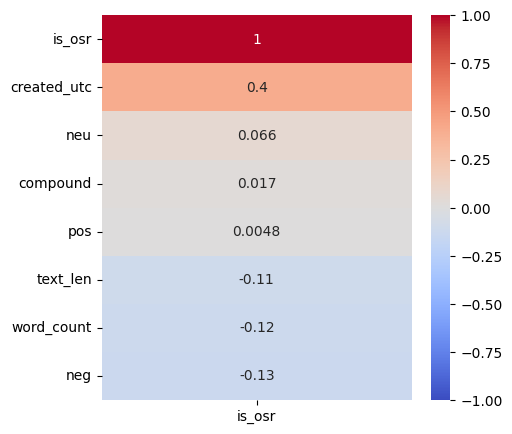

In [75]:
plt.figure(figsize=(5,5))
sns.heatmap(cleaned.corr(numeric_only=True)[["is_osr"]].sort_values(by="is_osr", ascending=False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap ="coolwarm");

# LABEL AXES ON THESE

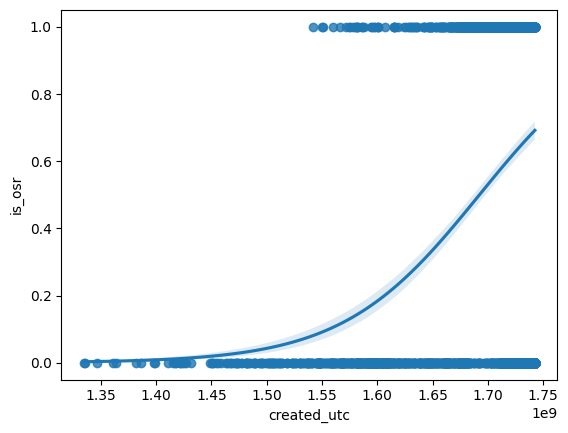

In [100]:
sns.regplot(data=cleaned, x="created_utc", y="is_osr", logistic=True);


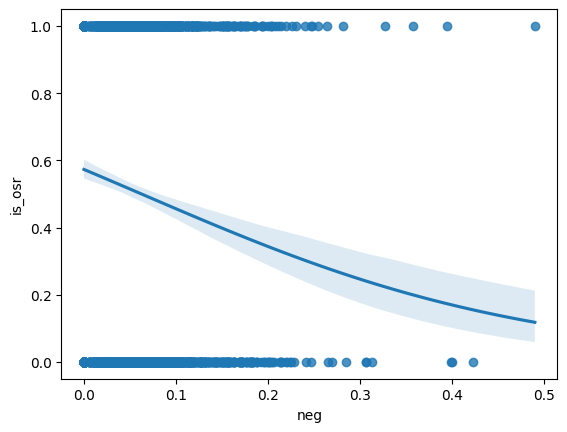

In [101]:
sns.regplot(data=cleaned, x="neg", y="is_osr", logistic=True);


**Created_utc seems to have some correlation with a post being from the osr subreddit. The number of characters and words in a post do not seems to have much correlation with determining if a post came from the osr subreddit, nor does sentiment analysis. That said, I am still interested to see how some of these variables affect the model. For numeric columns, I will model the the word count, negative sentiment, and created_utc. They have the most correlation compared to the other numeric variable options. I will also run a grid search with compound sentiment instead of negative sentiment to see if it reduces variance and still creates a good scoring model.** 

<Axes: xlabel='created_utc', ylabel='Count'>

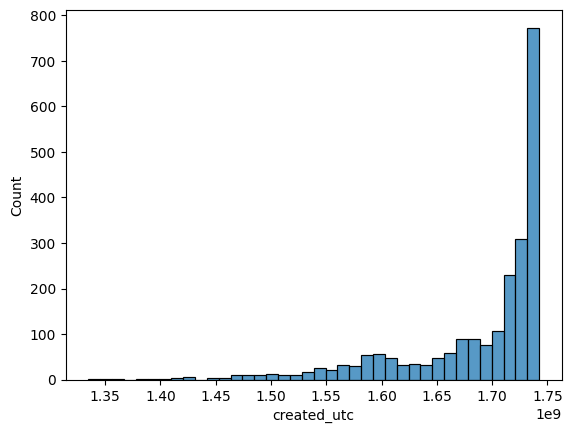

In [85]:
sns.histplot(data=cleaned, x="created_utc");

<Axes: xlabel='created_utc', ylabel='Count'>

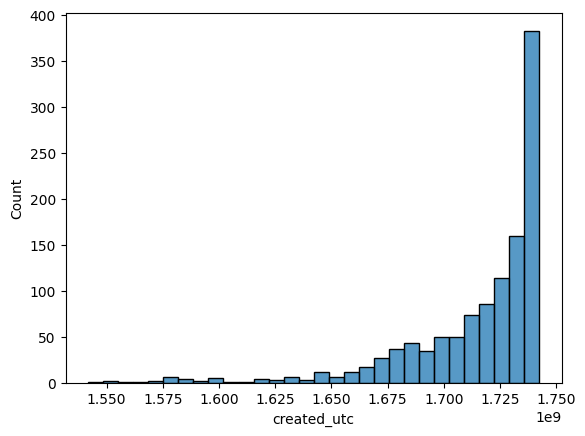

In [86]:
sns.histplot(data=osr_df, x="created_utc");

<Axes: xlabel='created_utc', ylabel='Count'>

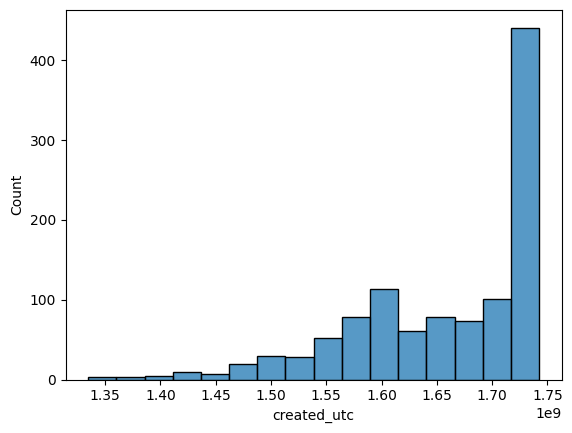

In [87]:
sns.histplot(data=rpg_df, x="created_utc");

There are more recent posts across both subreddits, though I tried to pulled data from older post as best I could, there will be bias towards posts that are more recent.

In [98]:
cleaned.describe()
osr_df.describe()
rpg_df.describe()

,created_utc,is_osr,text_len,word_count
count,1.102000e+03,1102.0,1102.000000,1102.000000
mean,1.659682e+09,0.0,1455.123412,249.803993
std,8.485067e+07,0.0,2567.775857,431.270697
min,1.334762e+09,0.0,8.000000,1.000000
25%,1.598693e+09,0.0,381.250000,64.250000
50%,1.684050e+09,0.0,776.000000,132.000000
75%,1.733247e+09,0.0,1696.750000,281.000000
max,1.742416e+09,0.0,39517.000000,6518.000000


In [92]:
print(f"Total data avg word count: {cleaned["word_count"].mean()}")
print(f"OSR avg word count:{osr_df["word_count"].mean()}")
print(f"RPG avg word count:{rpg_df["word_count"].mean()}")

Total data avg word count: 205.68135291499777
OSR avg word count:163.21572052401746
RPG avg word count:249.80399274047187


**It appears that the RPG subreddit has wordier posts on average (~ 250 words per document) when compared to the OSR subreddit (~163 words per document).**

We can't fully determine yet if finding a model with more than 75% accuracy is possible, but there are some positive signs that there are distinctive and specific words related to the individual subreddits. Additionally, there are a few numeric colummns that appear to have some moderate correlation to our target, "is_osr". This gives me great hope that a model would be able to have a high ratio of correct predictions.  